In [10]:
%matplotlib inline 
from ggplot import *
import pandas as pd
from os import listdir

def get_counts(fn):
    return pd.read_csv(fn, header=None, names=["value", "count"])

def load_output_dir(dn, fields=None):
    retval = {}
    if fields is None:
        fields = []
        files = listdir(dn)
        for l in files:
            fields.append(l[len("unique_"):-1 * len(".csv")])

    for d in fields:
        
        l = "{0}/unique_{1}.csv".format(dn, d)
        #print "Loading {0}, fields is {1}".format(l, fields)
        retval[d] = get_counts(l)
        
    return retval


def plot_bar(df, y, title, xlabel, ylabel, log=False):
    p = ggplot(aes(x="x", y=y), data=df) \
        + geom_bar(stat='identity') \
        + theme(axis_text_x = element_text(angle = 90, hjust = 0.5)) \
        + scale_x_discrete(limits=(0 - 0.5, df.shape[0] + 0.5), 
                           breaks=range(0, df.shape[0]), 
                           labels=df.index) \
        + ggtitle(title) \
        + xlab(xlabel) \
        + ylab(ylabel)
        
    if log:
        p = p + scale_y_log10()
        
    return p


def plot_hist(df, x, title, xlabel, ylabel):
    # Figure size: https://github.com/yhat/ggplot/issues/95
    p = ggplot(aes(x=x), data=df) \
    + geom_histogram() \
    + scale_x_continuous(limits=(0-0.01, max(df[x].max()+0.01, .11))) \
    + ggtitle(title) \
    + xlab(xlabel) \
    + ylab(ylabel) \
    + theme_matplotlib(rc={"figure.figsize": "11, 4", "figure.max_open_warning": False}, 
                       matplotlib_defaults=False)
    return p

In [11]:
# Subset of fields for developing graphs
#testing_fields = ["dwc_country", "dwc_recordNumber", "dwc_locality"]

# small recordset
recordset = "00d9fcc1-c8e2-4ef6-be64-9994ca6a32c3"

# all of iDigBio ~4 min & 24 GB to load
#recordset = "idigbio"

In [12]:
counts = load_output_dir("../out_{0}".format(recordset))
counts_raw = load_output_dir("../out_raw_{0}".format(recordset))

In [4]:
# Build dataframe contianing the number of unique values for every field

c = {}
for k, df in counts.iteritems():
#    # reduce to just testing data
#    if testing_fields and not k in testing_fields:
#        continue
    c[k] = df.shape[0]

#print c
cardinalities = pd.DataFrame(c.values(), index=c.keys(), columns=["card"])

# Reduce the dataframe to just those fields that are not completely unique and those
# fields that are sparesely populated.
max_card = cardinalities.max()["card"] * 0.95
#min_card = cardinalities[cardinalities["card"] > 0].min()["card"] * 100
#min_card = 100000
min_card = 100
print max_card
print min_card
cardinalities = cardinalities[cardinalities["card"] < max_card]
cardinalities = cardinalities[cardinalities["card"] > min_card]


139028.7
100


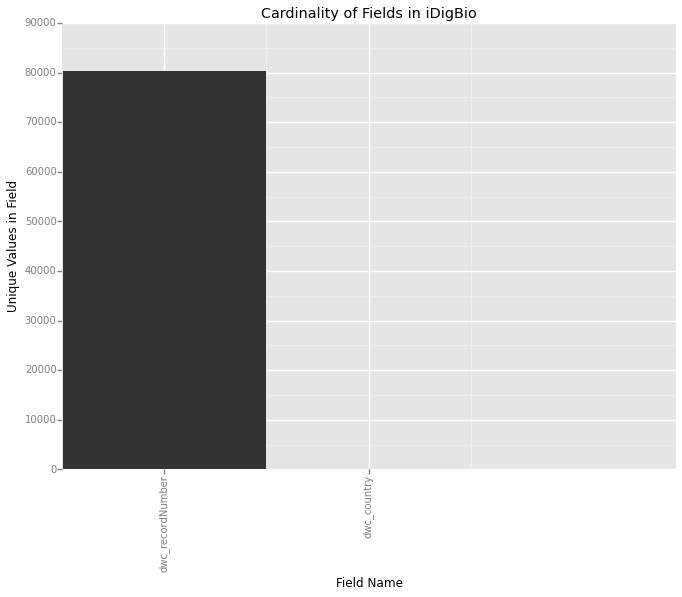

<ggplot: (8738789112529)>

In [5]:
# Sort for plotting and add an integer for the x-axis
cardinalities.sort(columns="card", inplace=True, ascending=False)
cardinalities["x"] = range(0, cardinalities.shape[0])


# small record set sizes: 187      389,196  146,346   80,476        3,180
#                         country  etag     locality  recordNumber  county

p = plot_bar(cardinalities, "card",
             "Cardinality of Fields in iDigBio",
             "Field Name",
             "Unique Values in Field")
p


In [13]:
if 1==0:
# Don't run this code
    # Now per-field frequency distributions of values
    # Really need some kind of normalization. 
    # 
    # Not that useful, these plots end up being a big spike on the left and a little spike on the
    # right. Keeping one running as an example
    # Sentance to read to interprete these: In this field, 
    # [y-axis] values occur in [x-axis] percent of the records.


    fields = ["dwc_kingdom"]
    #print counts[field]["count"].sum()
    #print counts[field].describe()
    #print counts[field].sort("count", ascending=True).head()
    #print counts[field].sort("count", ascending=False).head()

    figs = []
    for f in fields:
    #for f in counts.keys():

        counts[f]["norm"] = counts[f]["count"] / counts[f]["count"].sum()

        figs.append(plot_hist(counts[f], "norm", 
                      "Histogram of occurence of values in Field {0}".format(f), 
                      "Relative frequencey of how often the value occurs in this field", 
                      "Count of how many values occur this often")
                    )
    # Just put the array on the last line, don't try calling draw()
    figs

No raw data for idigbio_flags
Plotting dwc_minimumElevationInMeters
No raw data for idigbio_etag
Plotting dwc_collectionID
No raw data for idigbio_dateModified
Plotting dwc_recordNumber
No raw data for dwc_continent
Plotting dwc_catalogNumber
Plotting dwc_verbatimEventDate
Plotting dwc_kingdom
Plotting dwc_typeStatus
No raw data for idigbio_recordset
Plotting dwc_specificEpithet
No raw data for id
Plotting dwc_scientificName
Plotting dwc_occurrenceID
Plotting dwc_class
Plotting dwc_basisOfRecord
No raw data for idigbio_hasImage
No raw data for idigbio_isoCountryCode
No raw data for idigbio_uuid
Plotting dwc_family
No raw data for idigbio_geoPoint
Plotting dwc_order
Plotting dwc_institutionCode
Plotting dwc_infraspecificEpithet
Plotting dwc_phylum
Plotting dwc_recordedBy
Plotting dwc_country
Plotting dwc_collectionCode
No raw data for idigbio_dataQualityScore
No raw data for idigbio_mediarecords
Plotting dwc_genus
Plotting dwc_locality
Plotting dwc_county
Plotting dwc_eventDate
No raw d

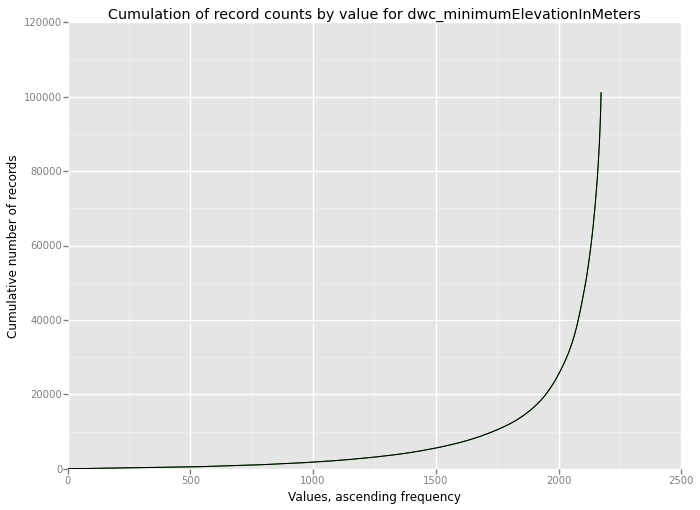

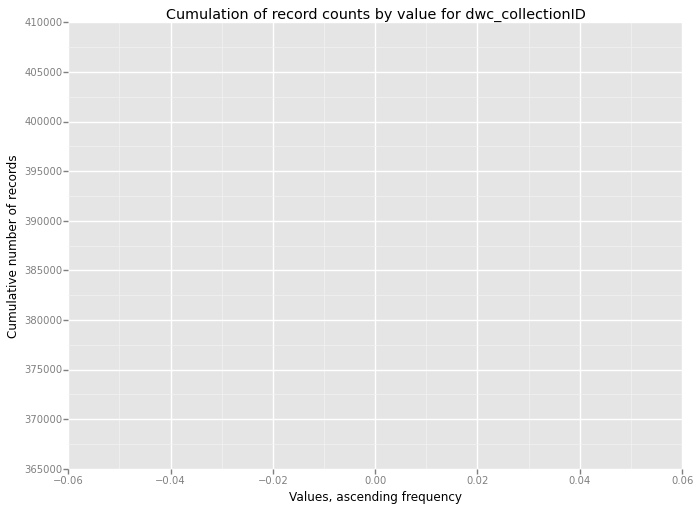

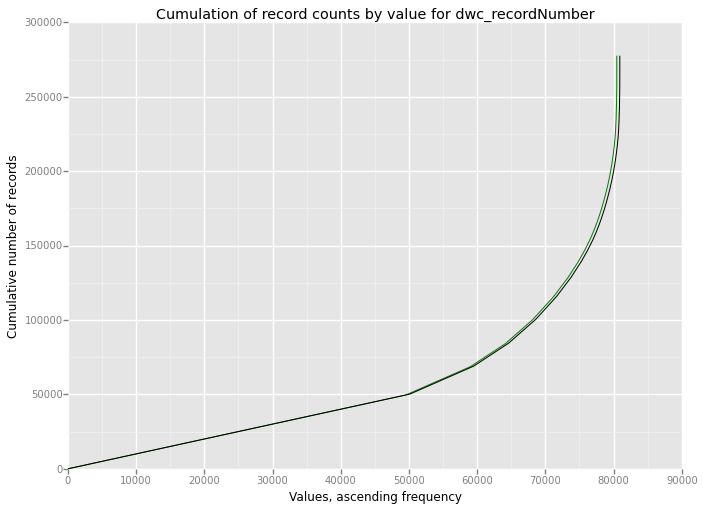

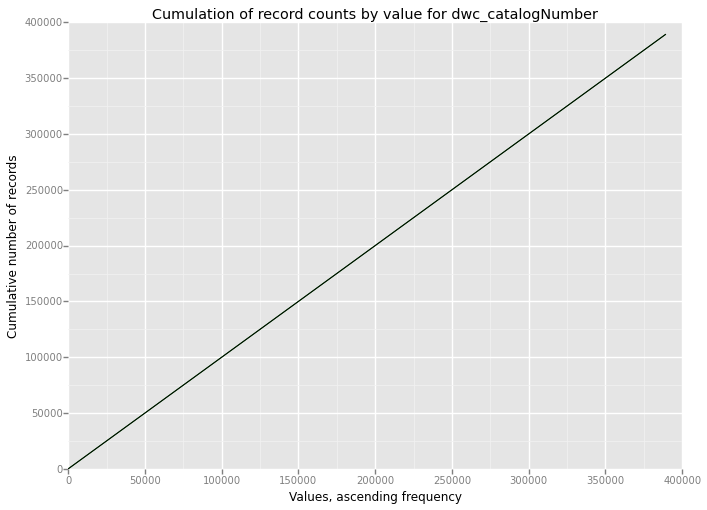

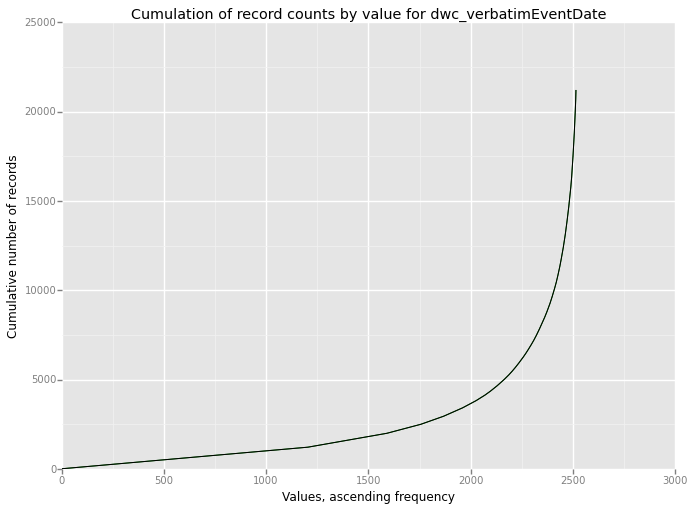

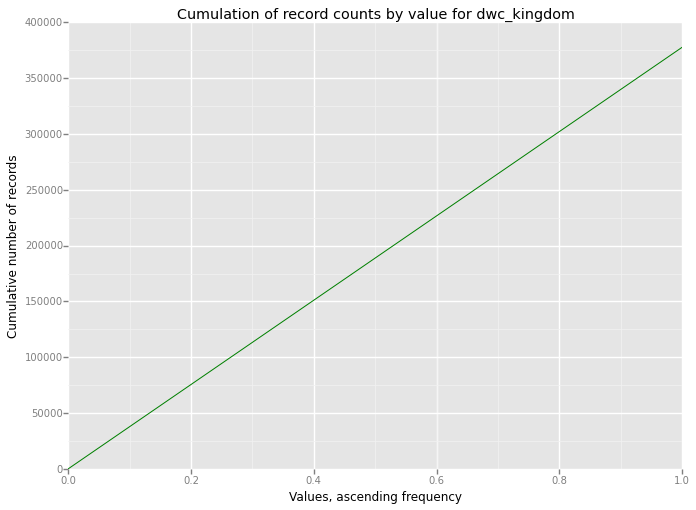

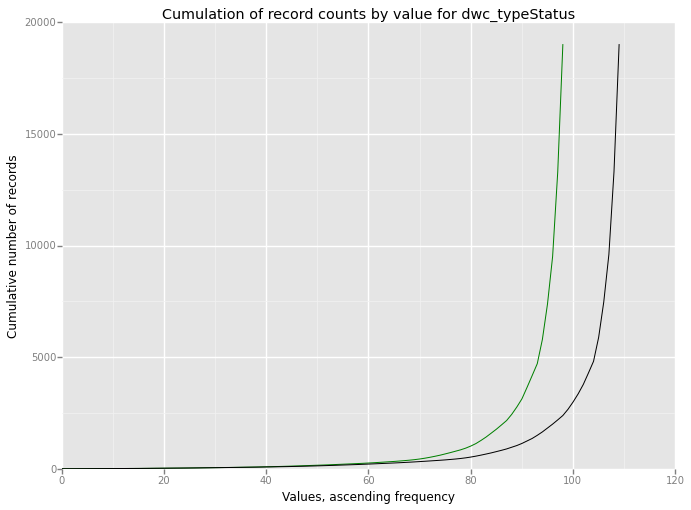

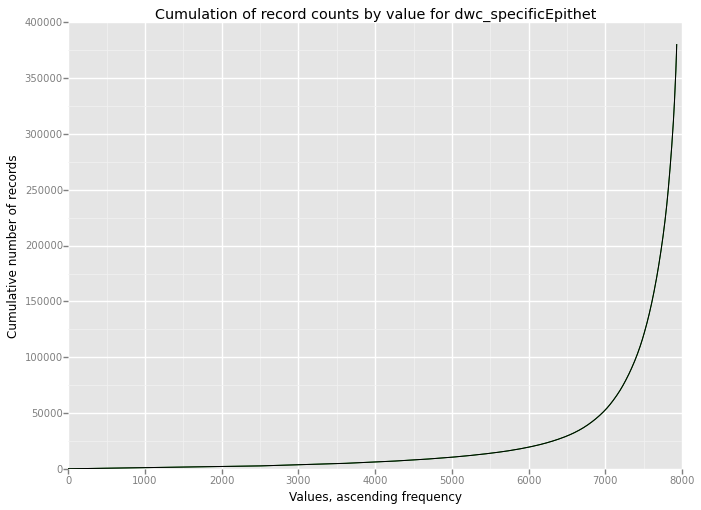

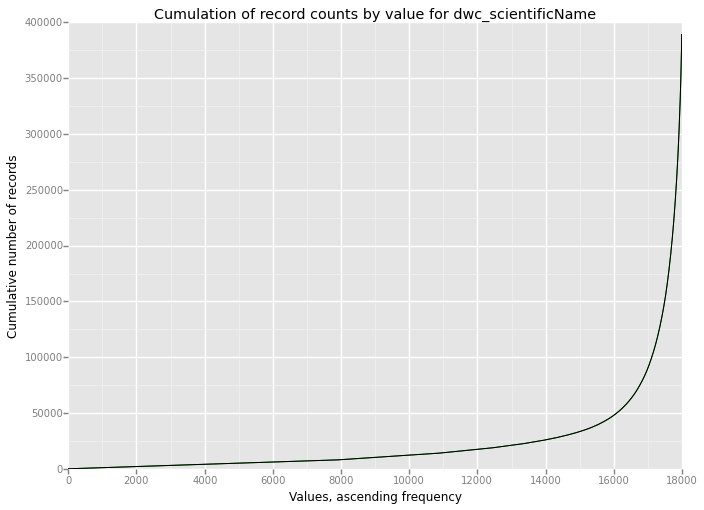

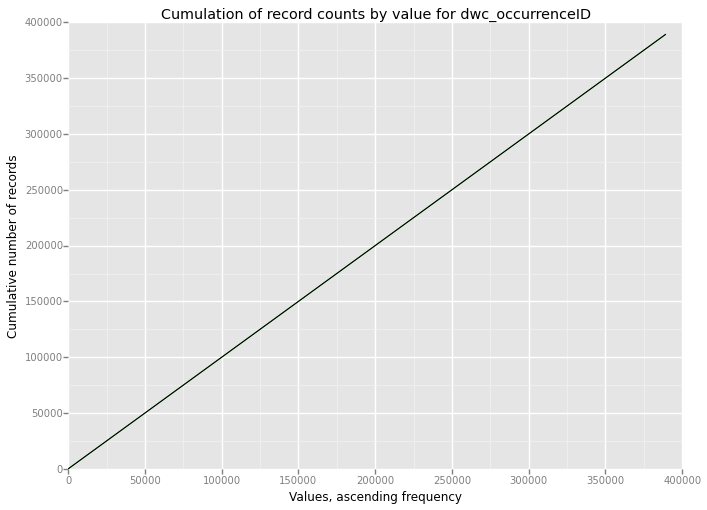

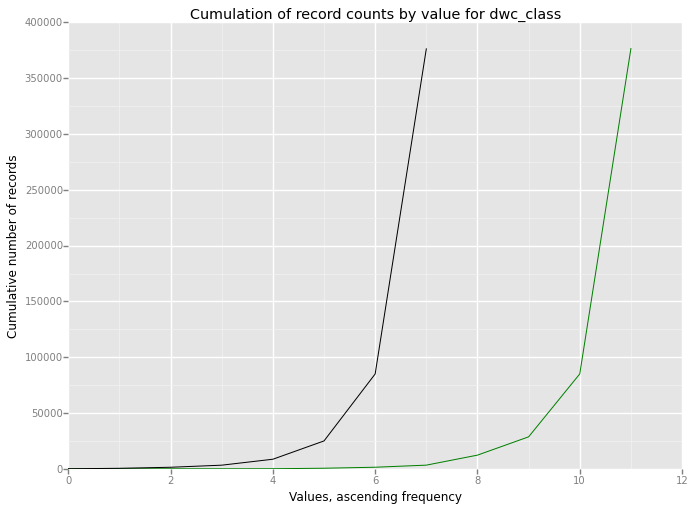

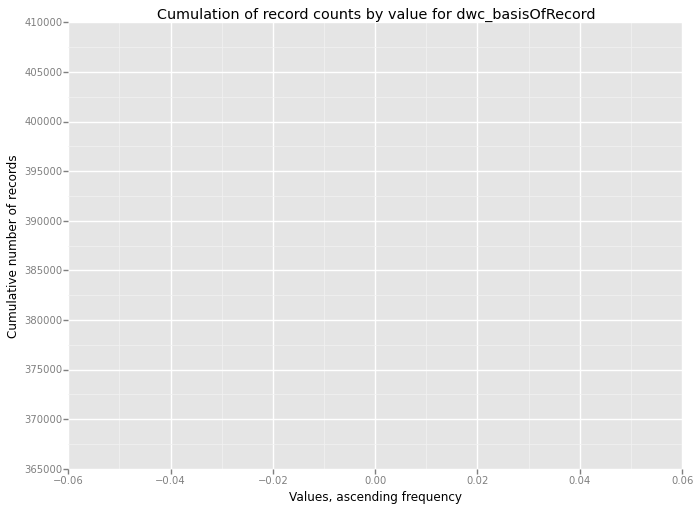

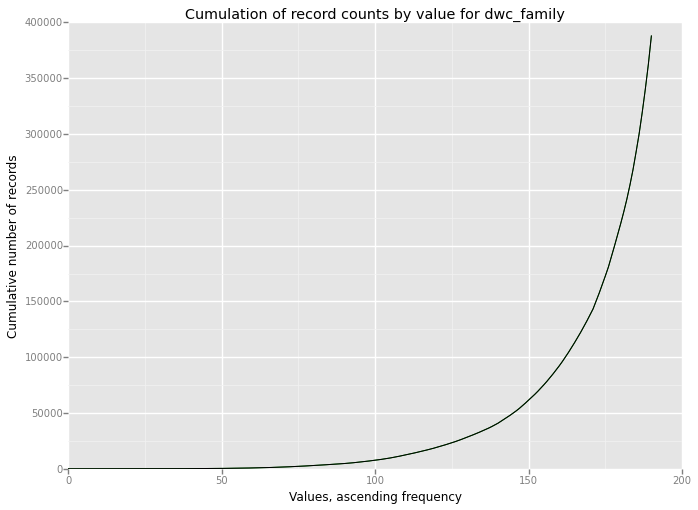

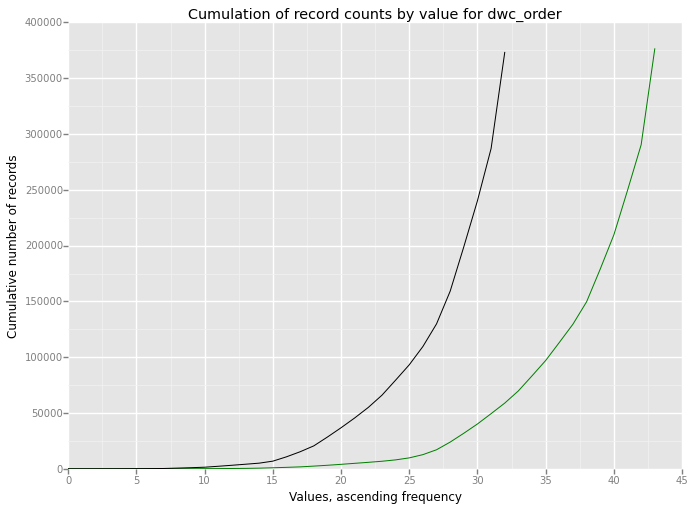

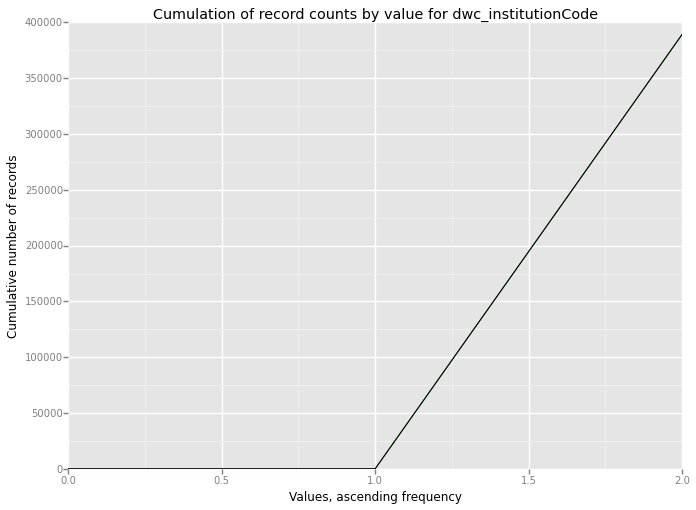

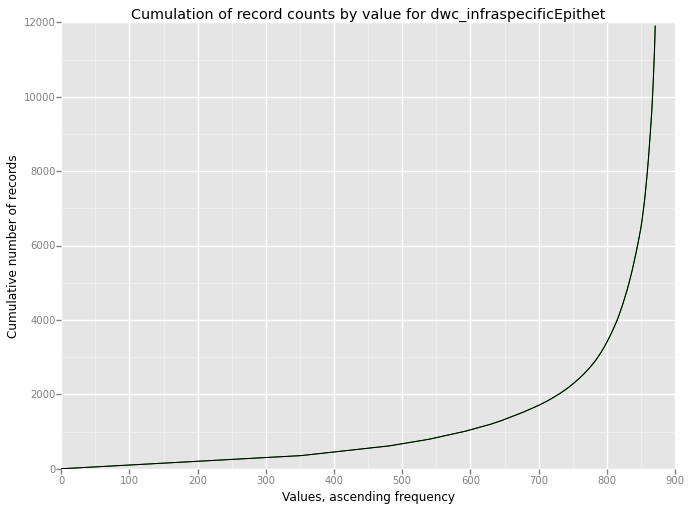

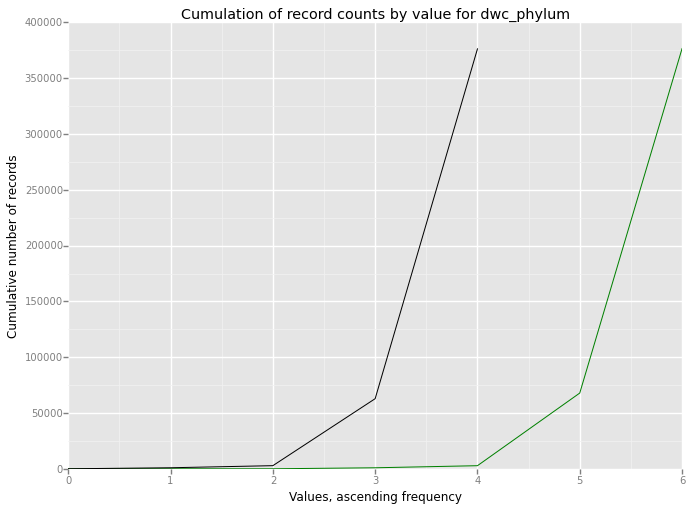

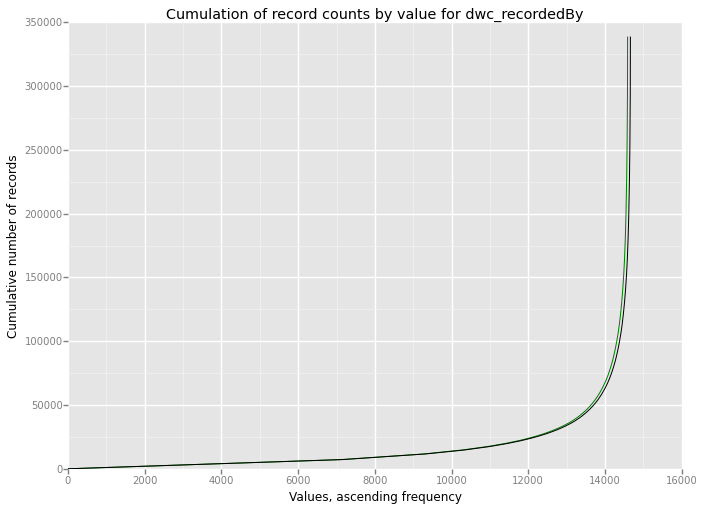

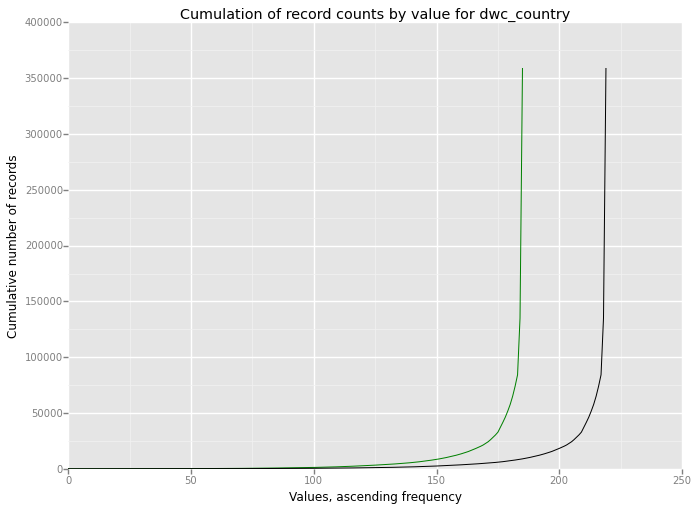

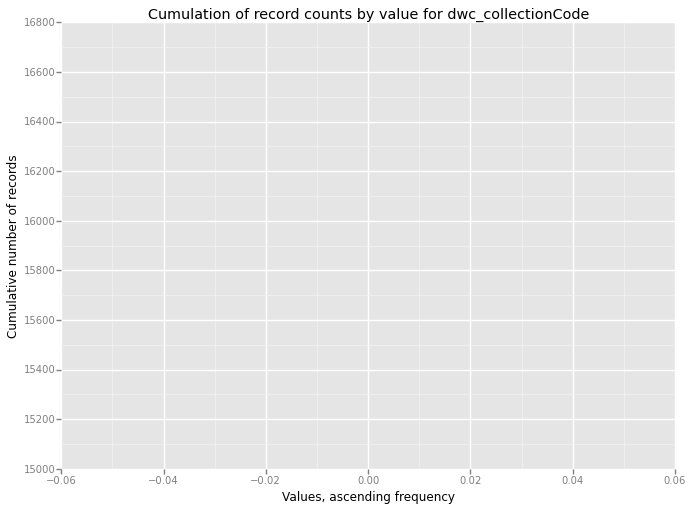

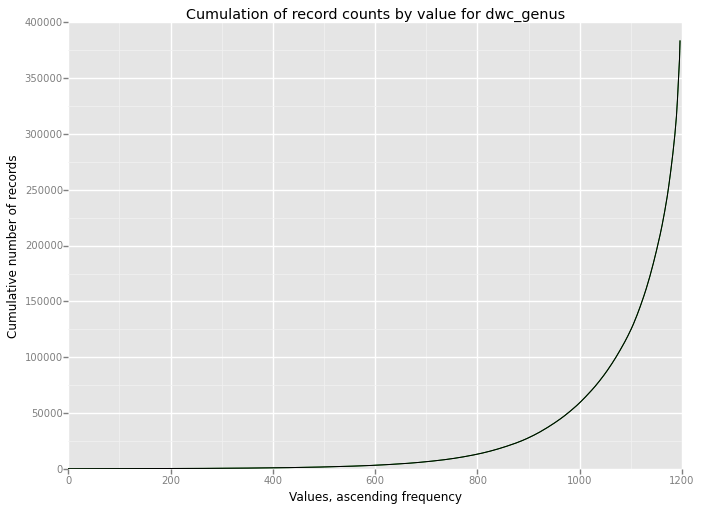

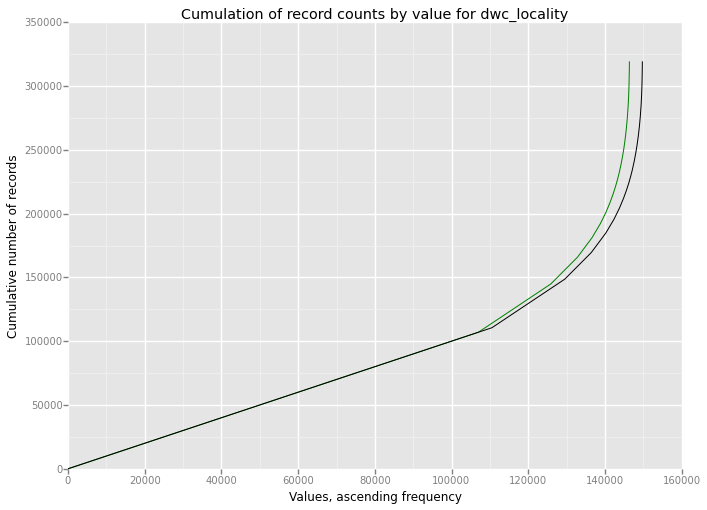

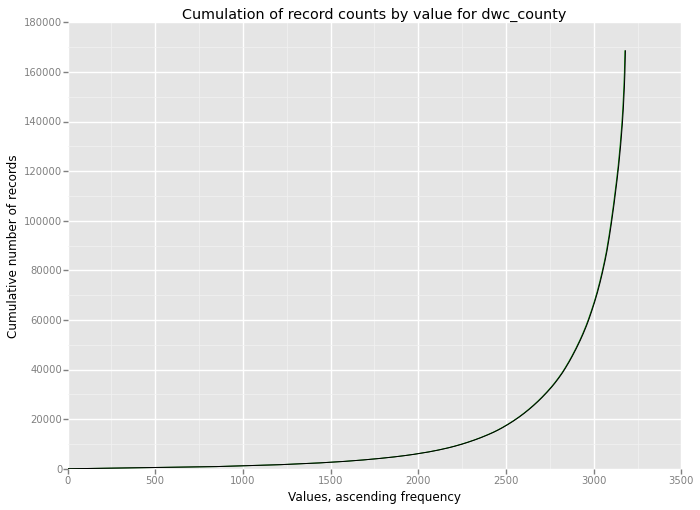

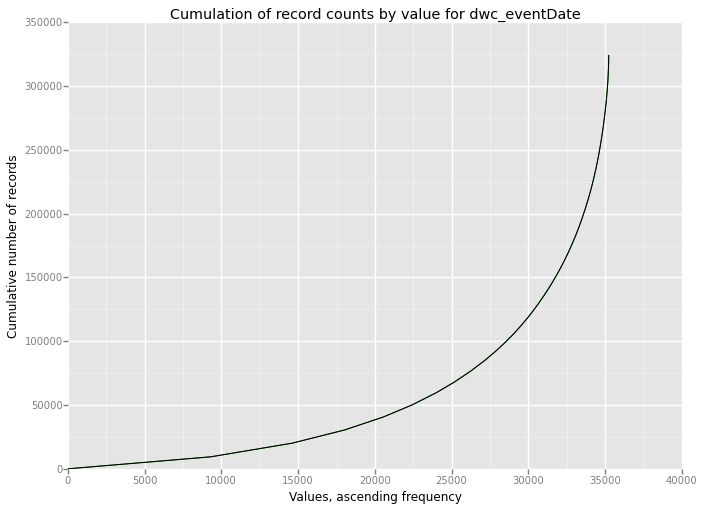

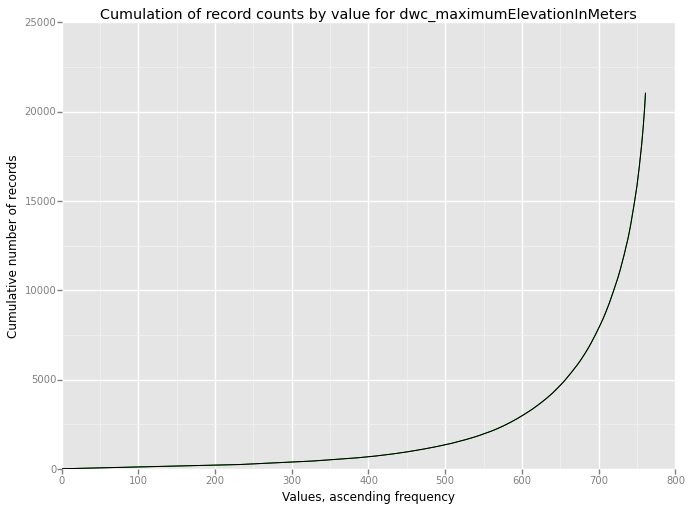

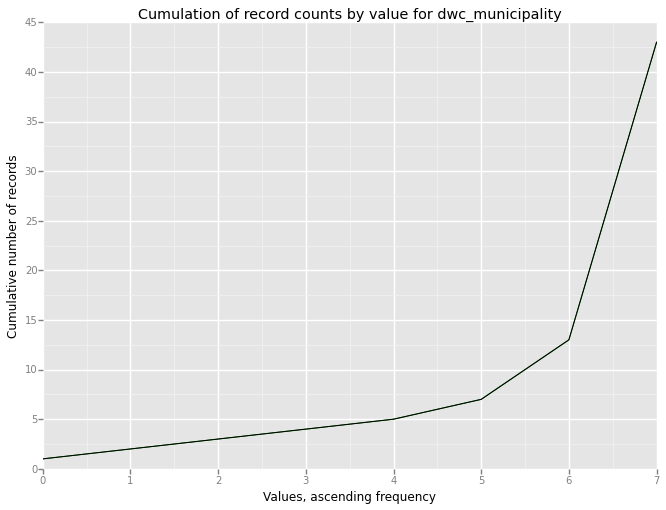

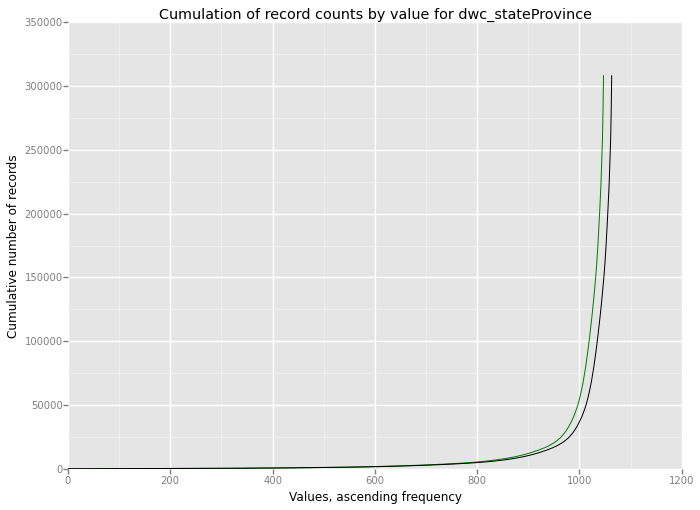

[<ggplot: (8742119175069)>,
 <ggplot: (8742120629237)>,
 <ggplot: (8742119169861)>,
 <ggplot: (8742119169925)>,
 <ggplot: (8742120138461)>,
 <ggplot: (8742119175161)>,
 <ggplot: (8742119164013)>,
 <ggplot: (8742120138481)>,
 <ggplot: (8742120137905)>,
 <ggplot: (8742120138361)>,
 <ggplot: (8742123222245)>,
 <ggplot: (8742123222141)>,
 <ggplot: (8742120785649)>,
 <ggplot: (8742120785477)>,
 <ggplot: (8742120144893)>,
 <ggplot: (8742120137941)>,
 <ggplot: (8742120144825)>,
 <ggplot: (8742120785509)>,
 <ggplot: (8742120137853)>,
 <ggplot: (8742120144649)>,
 <ggplot: (8742120144733)>,
 <ggplot: (8742116242953)>,
 <ggplot: (8742116229813)>,
 <ggplot: (8742120147677)>,
 <ggplot: (8742116242965)>,
 <ggplot: (8742116229677)>,
 <ggplot: (8742120144785)>]

In [18]:
# As an alternative to the above, lets try a cumulative records graph. This shows the 
# cumulative number of records as each value is considered from most uncommon value to most 
# common.

def plot_line(df, df_raw, x, y, title, xlabel, ylabel, log=False):
    p = ggplot(aes(x=x, y=y), data=df) \
        + geom_line(size=1, color="green") \
        + geom_line(aes(x=x, y=y), data=df_raw, size=1) \
        + ggtitle(title) \
        + xlab(xlabel) \
        + ylab(ylabel)
#        + scale_x_discrete(limits=(0 - 0.5, df.shape[0] + 0.5), 
#                           breaks=range(0, df.shape[0]), 
#                           labels=df.index) \        
#  + theme(axis_text_x = element_text(angle = 90, hjust = 0.5)) \      
    if log:
        p = p + scale_y_log10()
        
    return p

def cumulate_df(df):
    # Remove blank/null value line, sort by increasing count
    df = df.sort("count")[ df["value"].notnull() ]
    
    # If the result is nothing left, return False
    if not df.shape[0] > 0:
        return False
    
    # Calculate cumulative count and percentage of records
    df["cum_count"] = df["count"].cumsum()
    df["cum_perc_pop"] = df["cum_count"] / df["count"].sum() * 100
    
    # add increasing integer x representing number of values for plotting
    df["x"] = range(0, df.shape[0])
    df["x_perc"] = df["x"] / df.shape[0] * 100
    
    return df

# Cumulate all the raw and corrected dataframes into dfs for graphing
dfs = {}
dfs_raw = {}
for f in counts.keys():
    df = cumulate_df(counts[f])
    if df is not False:
        dfs[f] = df
        
for f in counts_raw.keys():
    df = cumulate_df(counts_raw[f])
    if df is not False:
        dfs_raw[f] = df

    
#testing_fields = ["dwc_country"]
figs = []
#for f in testing_fields:
for f in dfs.keys():
    
    if not isinstance(dfs_raw.get(f), pd.DataFrame):
        print "No raw data for {0}".format(f)
        continue
    
    
#    figs.append(plot_line(dfs[f], dfs_raw[f], "x", "cum_perc_pop",
#                         "Cumulation of percent of record counts by value for {}".format(f),
#                         "Values, ascending frequency",
#                         "Cumulative percent of records with value populated"))

    print "Plotting {0}".format(f)
    figs.append(plot_line(dfs[f], dfs_raw[f], "x", "cum_count",
                         "Cumulation of record counts by value for {}".format(f),
                         "Values, ascending frequency",
                         "Cumulative number of records"))

#    figs.append(plot_line(dfs[f], dfs_raw[f], "x_perc", "cum_perc_pop",
#                         "Cumulation of percent of record counts by value for {}".format(f),
#                         "Percentage of values, ascending frequency",
#                         "Cumulative percent of records with value populated"))


#    figs.append(plot_line(dfs[f], dfs_raw[f], "x_perc", "cum_count",
#                         "Cumulation of record counts by value for {}".format(f),
#                         "Percentage of values, ascending frequency",
#                         "Cumulative number of records"))          
    
figs